In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Text(0.5, 1.0, 'Data with Outlier')

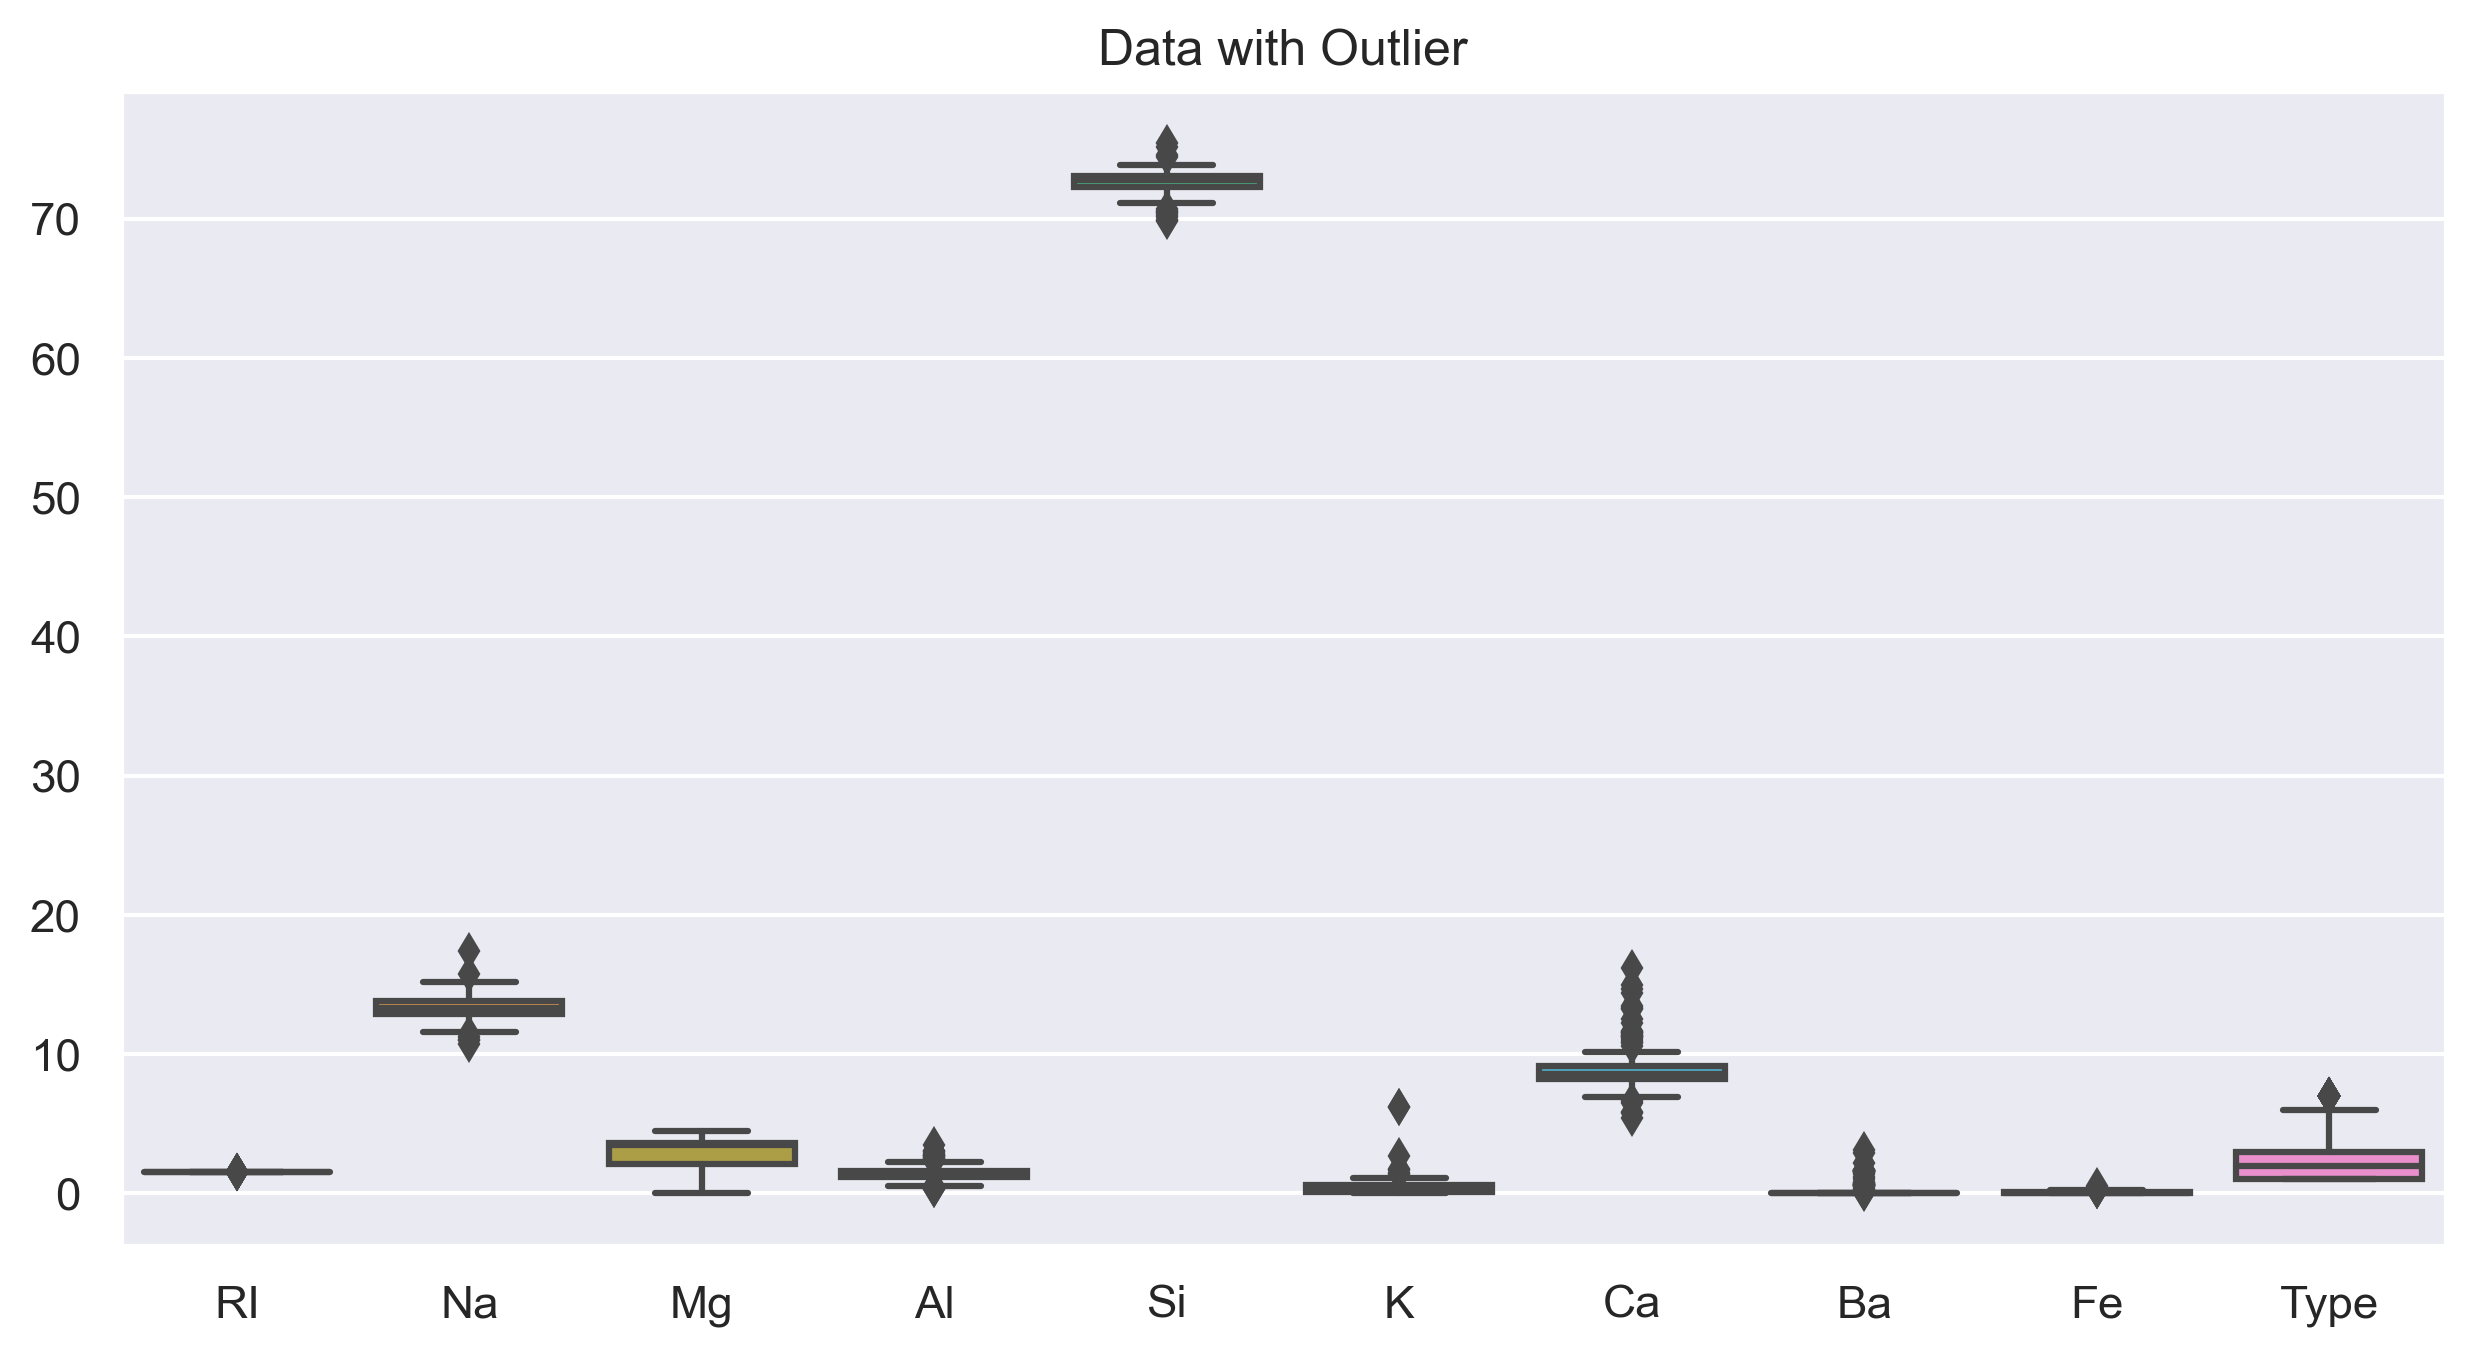

In [9]:
sns.boxplot(df)
plt.title('Data with Outlier')

In [10]:
# Function for remove outlier

def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    
    df.loc[df[col]>upper, col] = upper
    df.loc[df[col]<lower, col] = lower

In [11]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [12]:
# removing outlier from the columns

remove_outlier(df, 'RI')
remove_outlier(df, 'Na')
remove_outlier(df, 'Mg')
remove_outlier(df, 'Al')
remove_outlier(df, 'Si')
remove_outlier(df, 'K')
remove_outlier(df, 'Ca')
remove_outlier(df, 'Ba')
remove_outlier(df, 'Fe')

Text(0.5, 1.0, 'Data with Outlier')

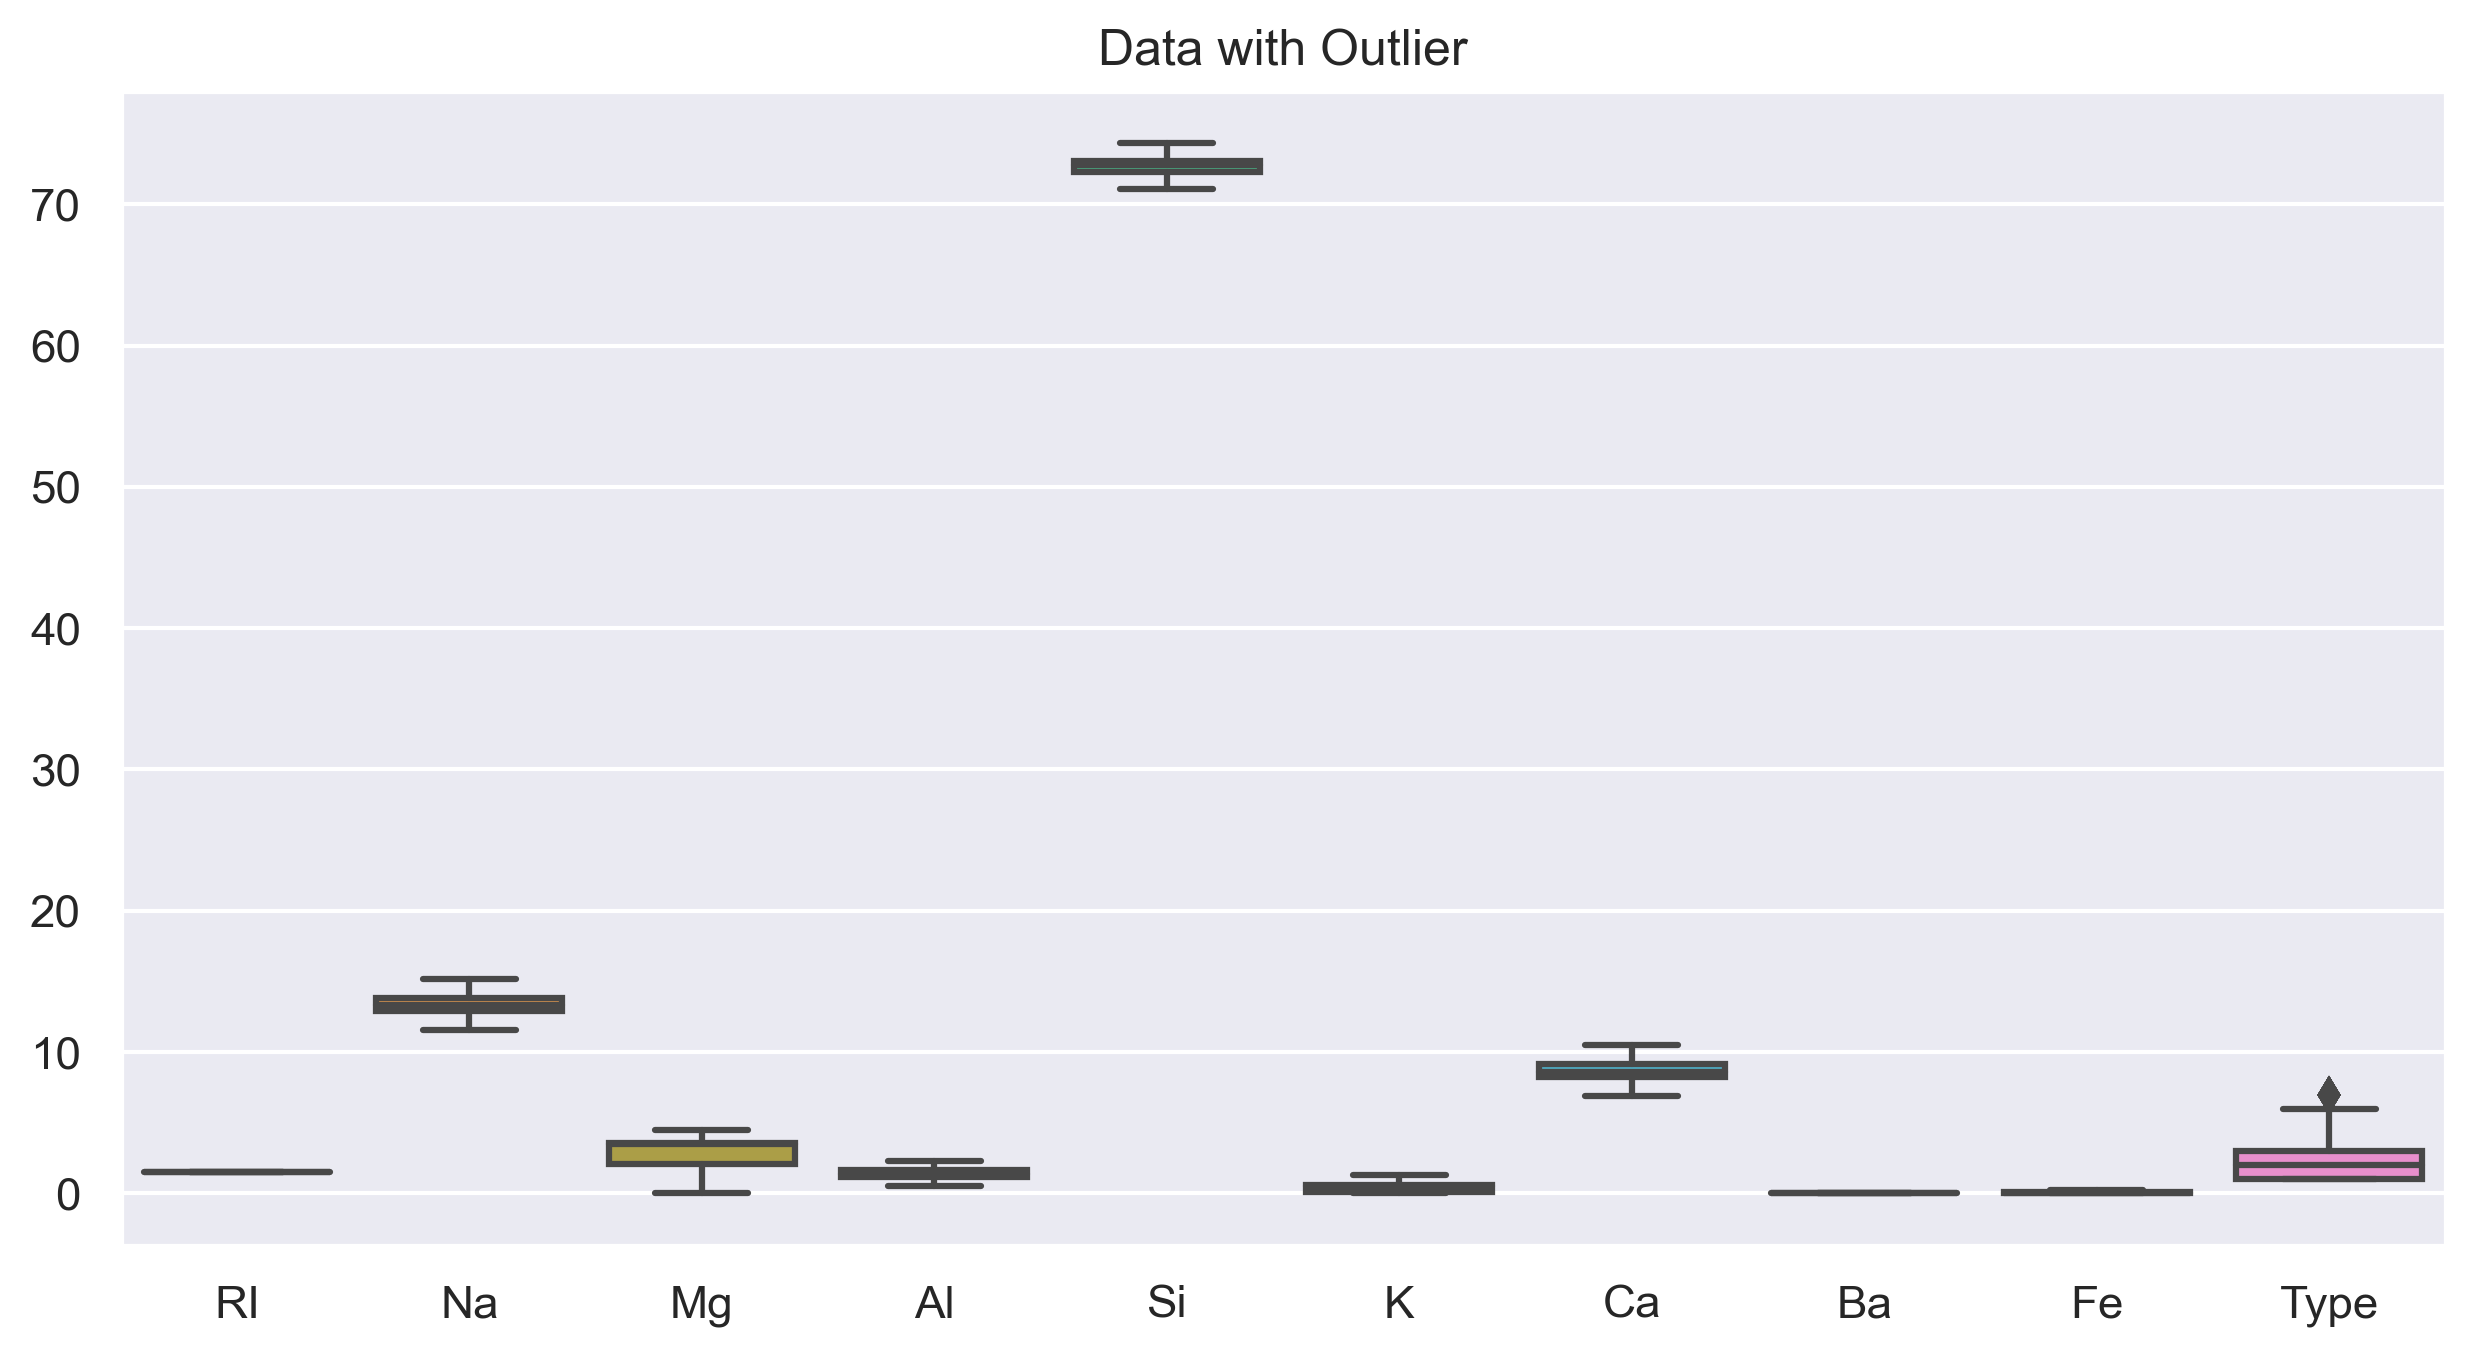

In [13]:
sns.boxplot(df)
plt.title('Data with Outlier')

-----------
* Visualization

Text(0.5, 1.0, 'count of all categories in target')

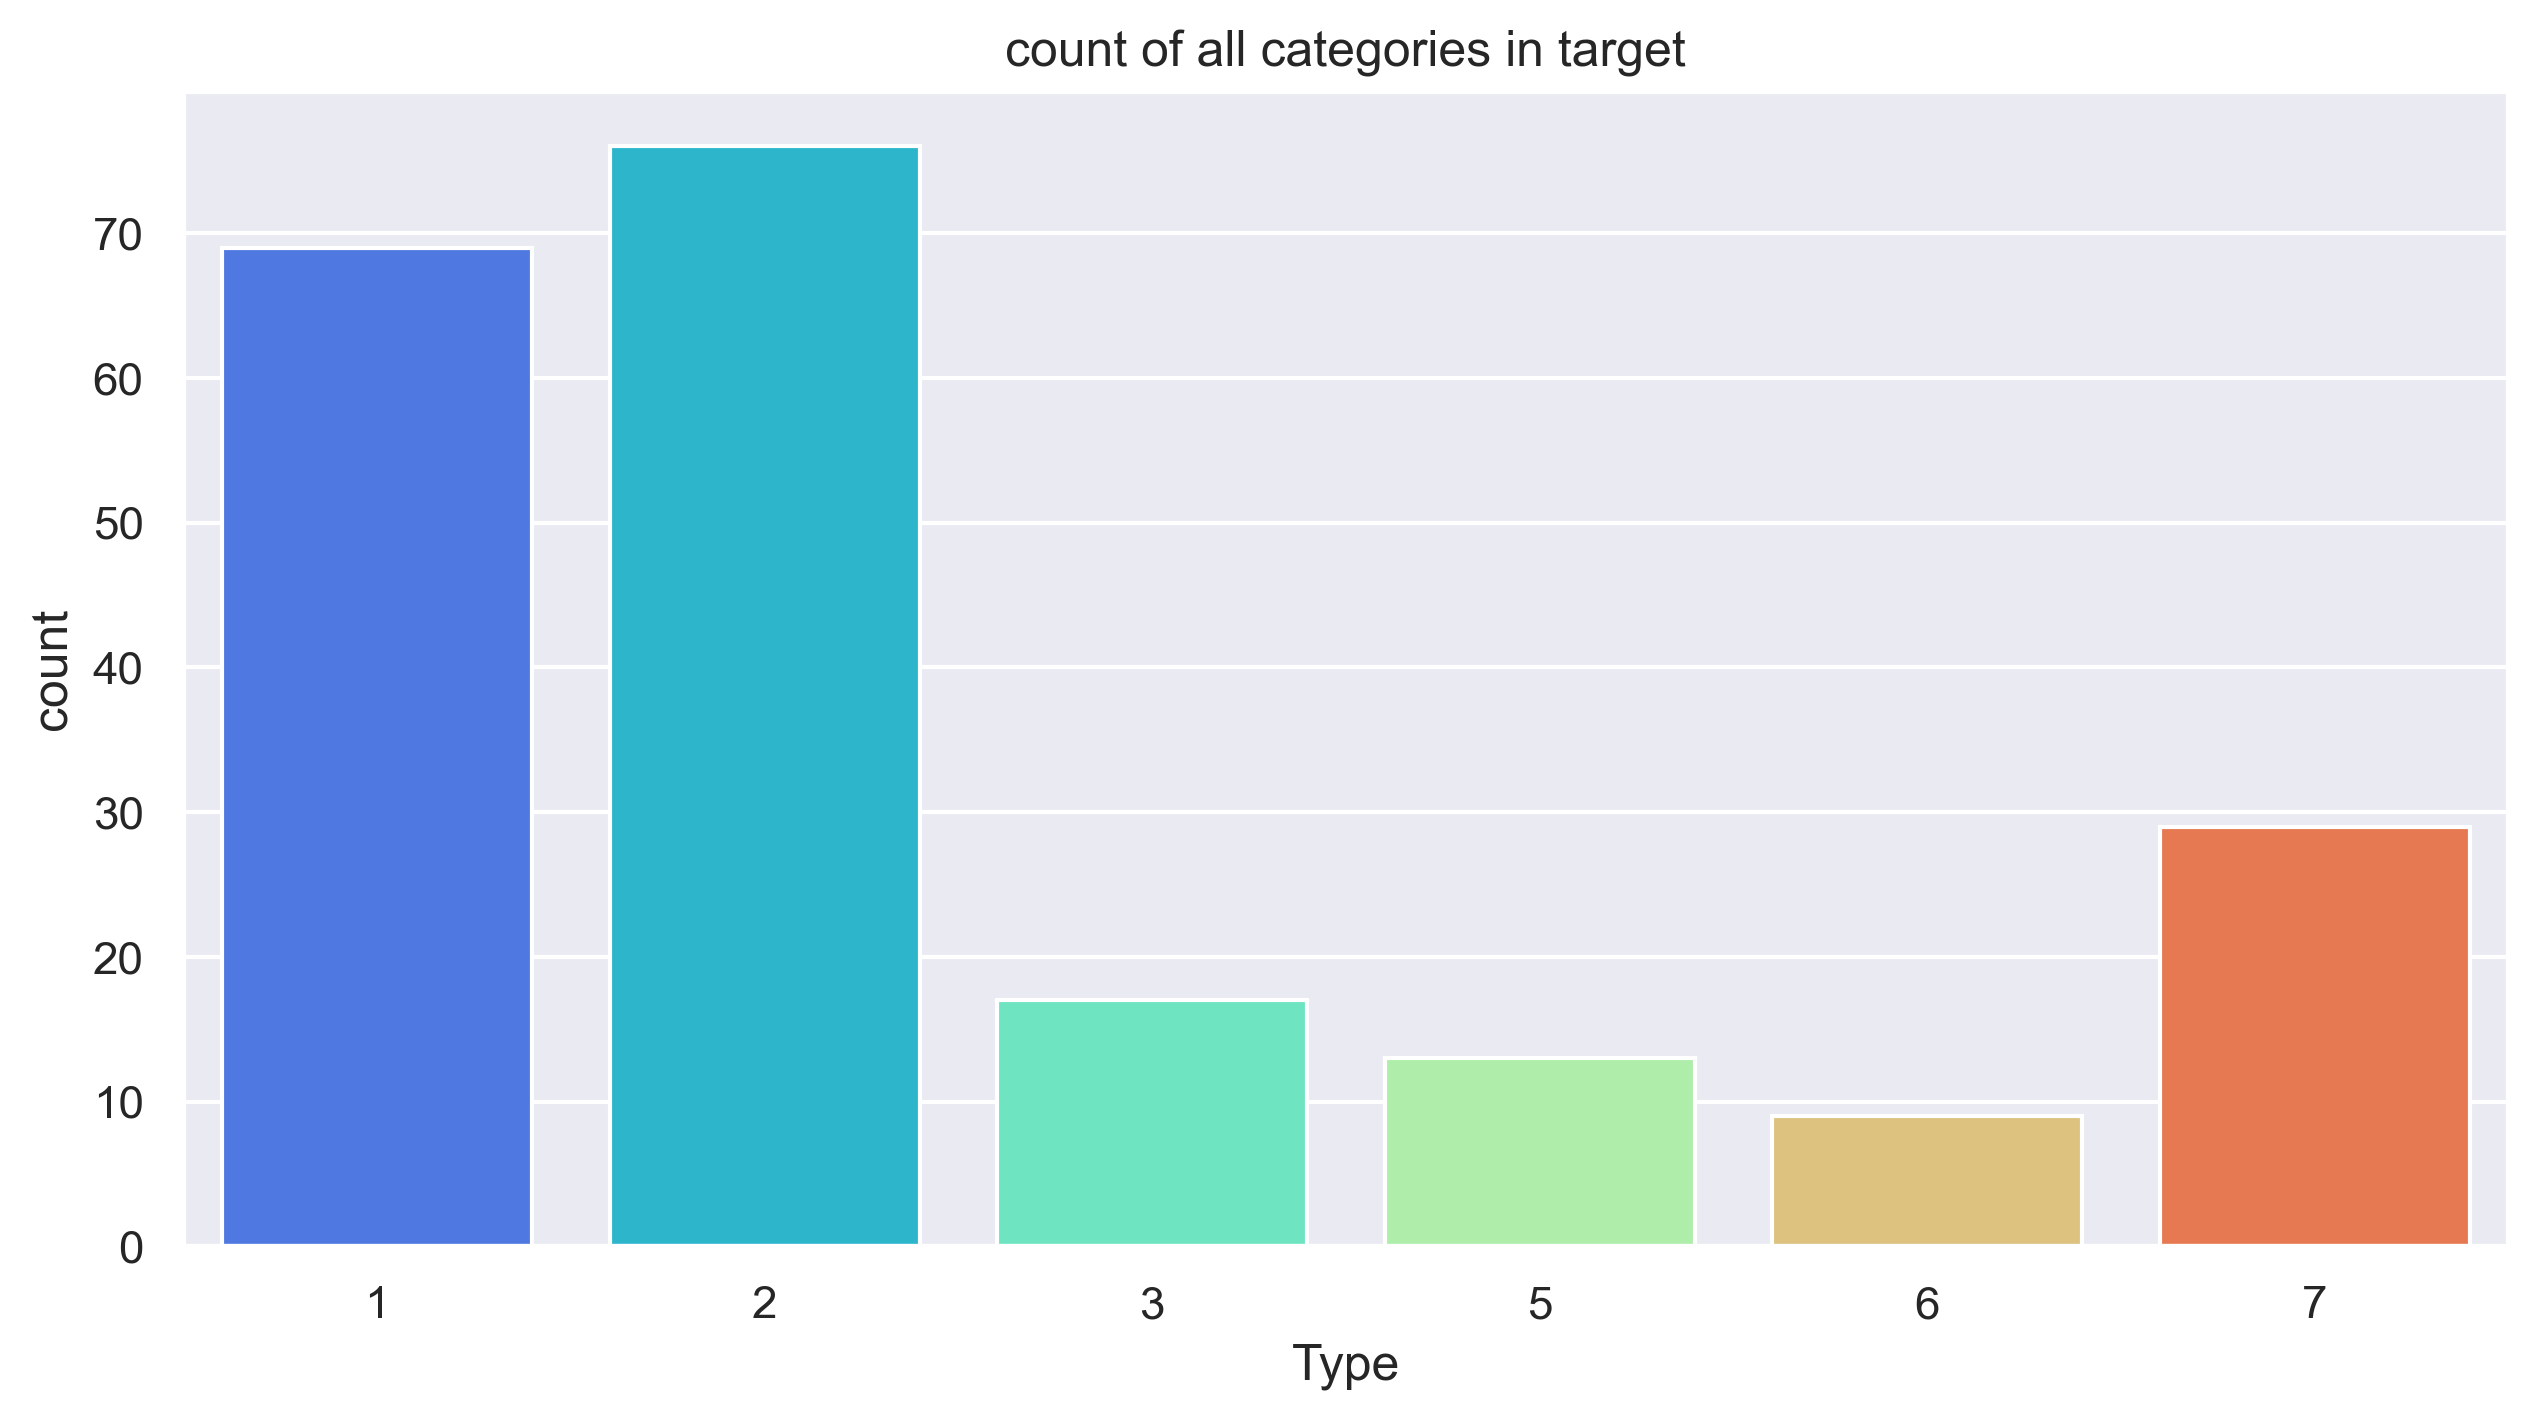

In [14]:
sns.countplot(data = df, x = 'Type')
plt.title('count of all categories in target')

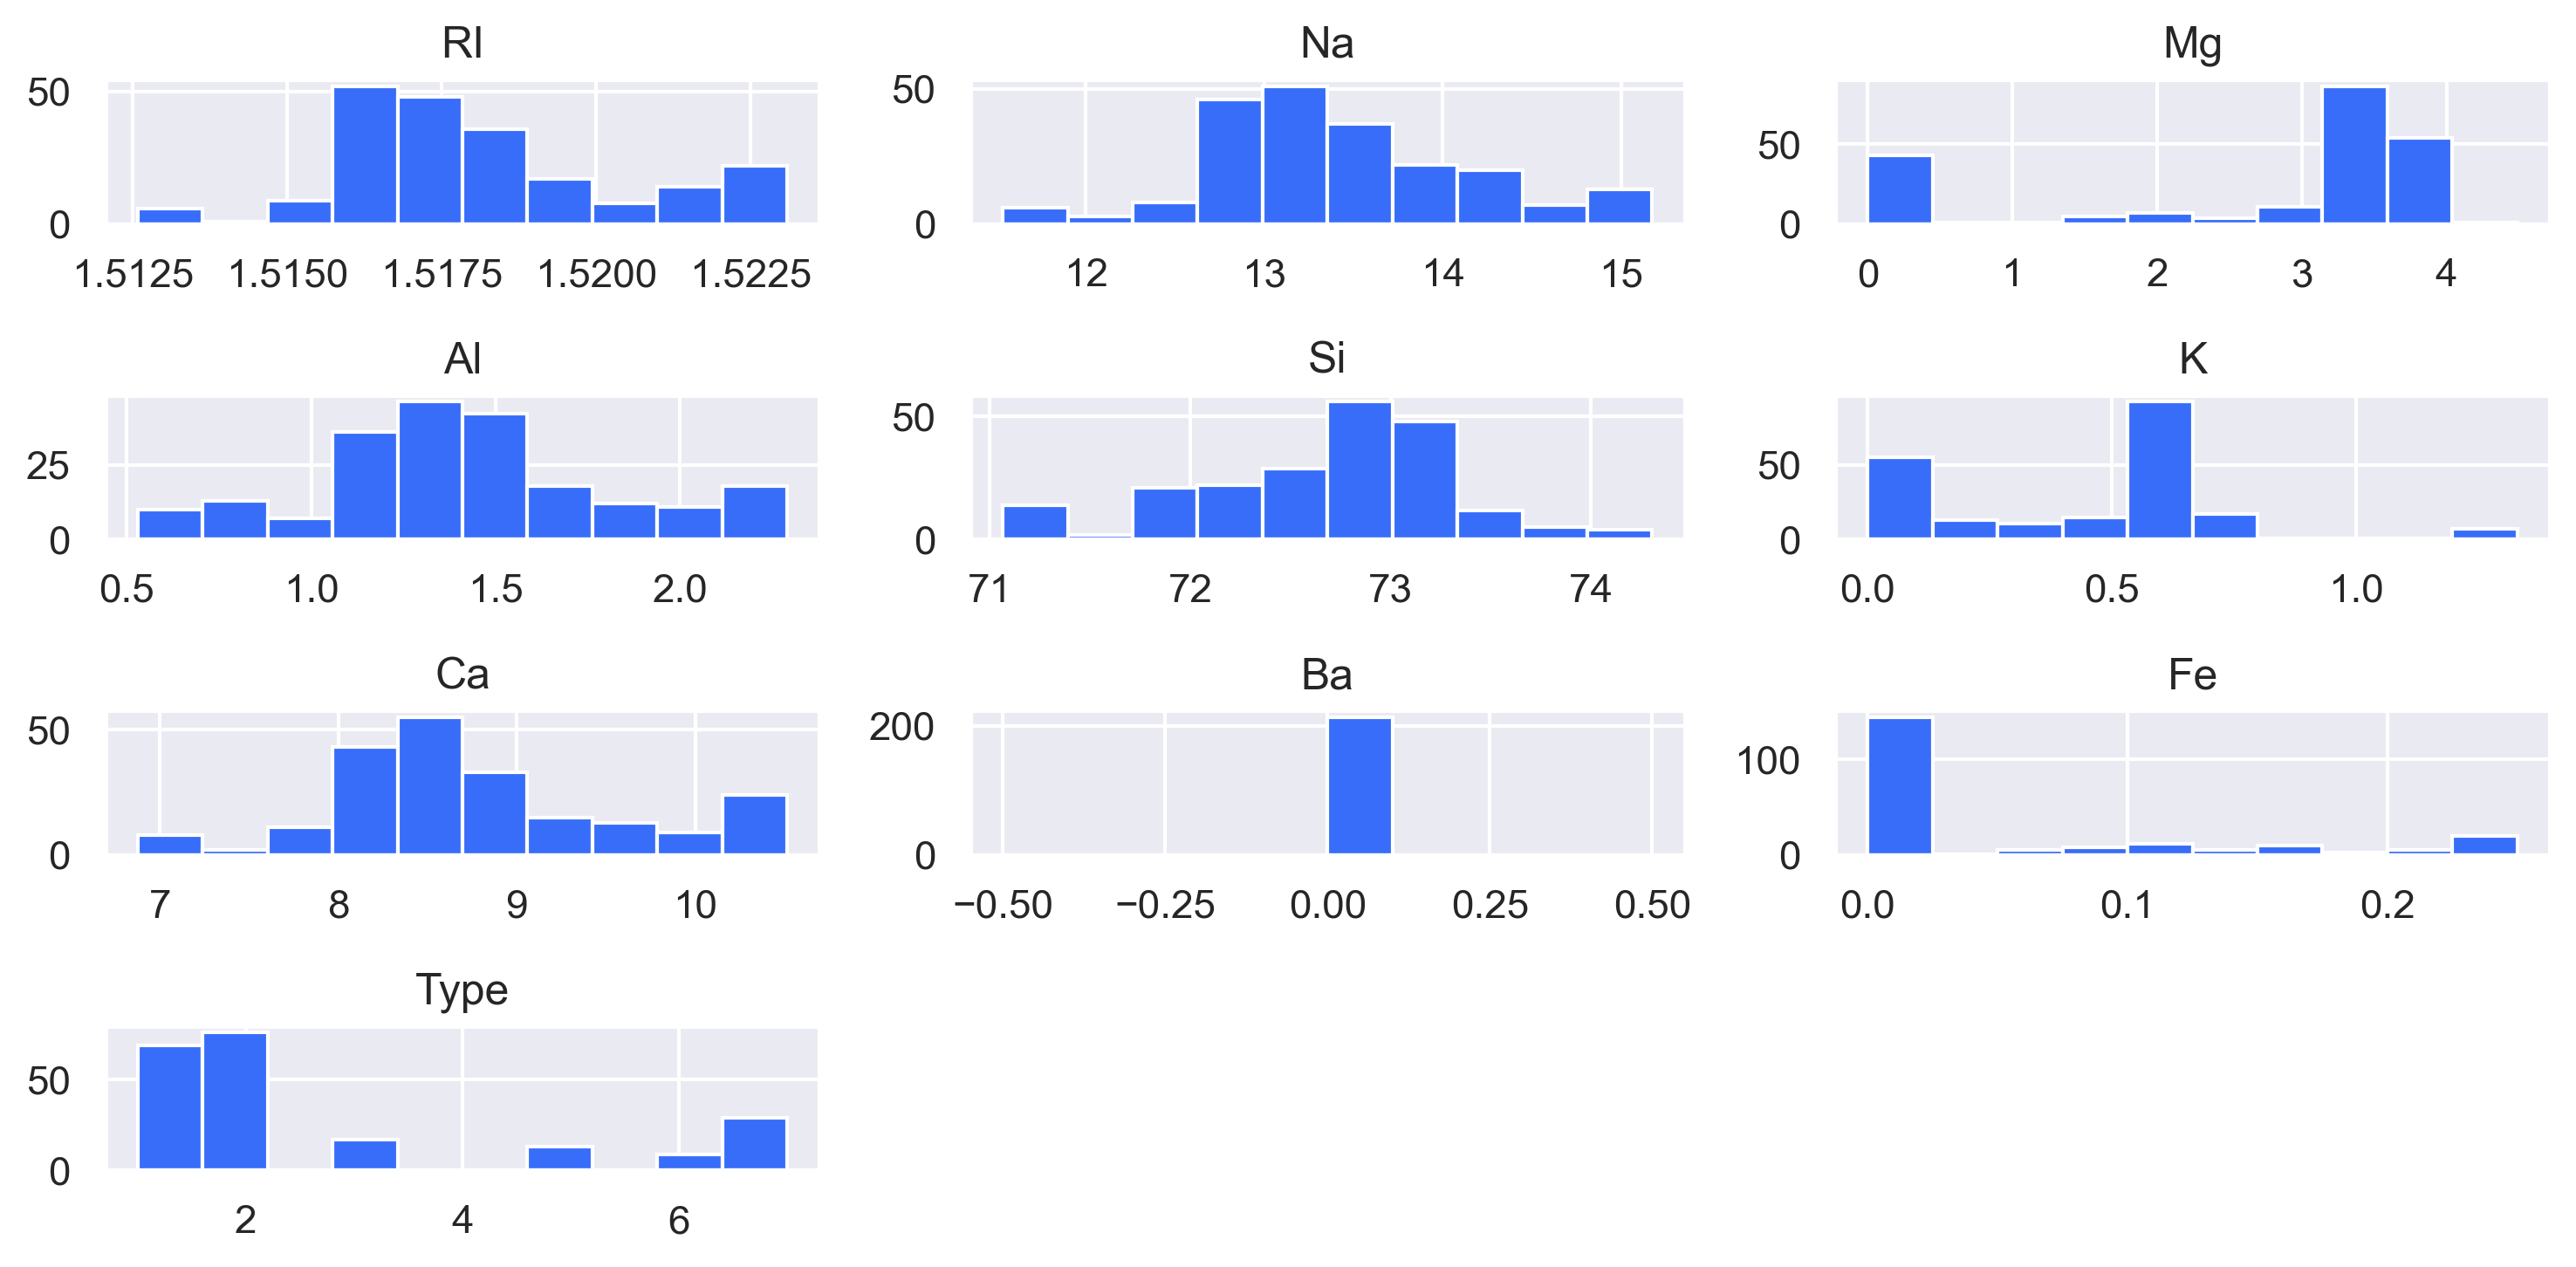

In [15]:
df.hist()
plt.tight_layout()

---------------
* splitting into features & target

In [16]:
x = df.drop('Type', axis = 1)
y = df['Type']

In [17]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0


In [18]:
# standardizing the features
sc = StandardScaler()

x = sc.fit_transform(x)

------------
* train test split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [20]:
x_train

array([[-0.16777717, -0.74500931,  0.55599466, ..., -0.26566891,
         0.        ,  1.95226909],
       [ 1.6787981 ,  0.44431527,  0.80594289, ...,  1.10840708,
         0.        , -0.62110164],
       [-0.63472724, -0.3530728 ,  0.53516564, ..., -0.47527372,
         0.        ,  1.36741211],
       ...,
       [-0.71538225,  0.0118336 ,  0.6045957 , ..., -0.80132565,
         0.        , -0.62110164],
       [-0.21871718, -0.81258457,  0.68096878, ..., -0.26566891,
         0.        , -0.62110164],
       [ 0.11239287, -0.51525343,  0.65319675, ...,  0.39807967,
         0.        ,  1.13346931]])

--------------
# KNN Model

In [21]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

ypred = knn.predict(x_test)
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.8, 0.6046511627906976)

In [22]:
print(f'CLASSIFICATION REPORT\n {classification_report(y_test,ypred)}')

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           1       0.60      0.71      0.65        17
           2       0.47      0.73      0.57        11
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.60        43
   macro avg       0.68      0.61      0.62        43
weighted avg       0.57      0.60      0.57        43



In [23]:
print(f' Training accuracy : {knn.score(x_train,y_train)}')
print(f' Testing accuracy : {knn.score(x_test,y_test)}')

 Training accuracy : 0.8
 Testing accuracy : 0.6046511627906976


------------
# Hyperparameter Tuning for KNN

In [24]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test,y_test))

In [25]:
train_acc

[1.0,
 0.8529411764705882,
 0.8764705882352941,
 0.8294117647058824,
 0.8,
 0.788235294117647,
 0.7705882352941177,
 0.711764705882353,
 0.7235294117647059,
 0.7235294117647059,
 0.711764705882353,
 0.6823529411764706,
 0.6705882352941176,
 0.6705882352941176,
 0.6647058823529411,
 0.6705882352941176,
 0.6705882352941176,
 0.6764705882352942,
 0.6470588235294118]

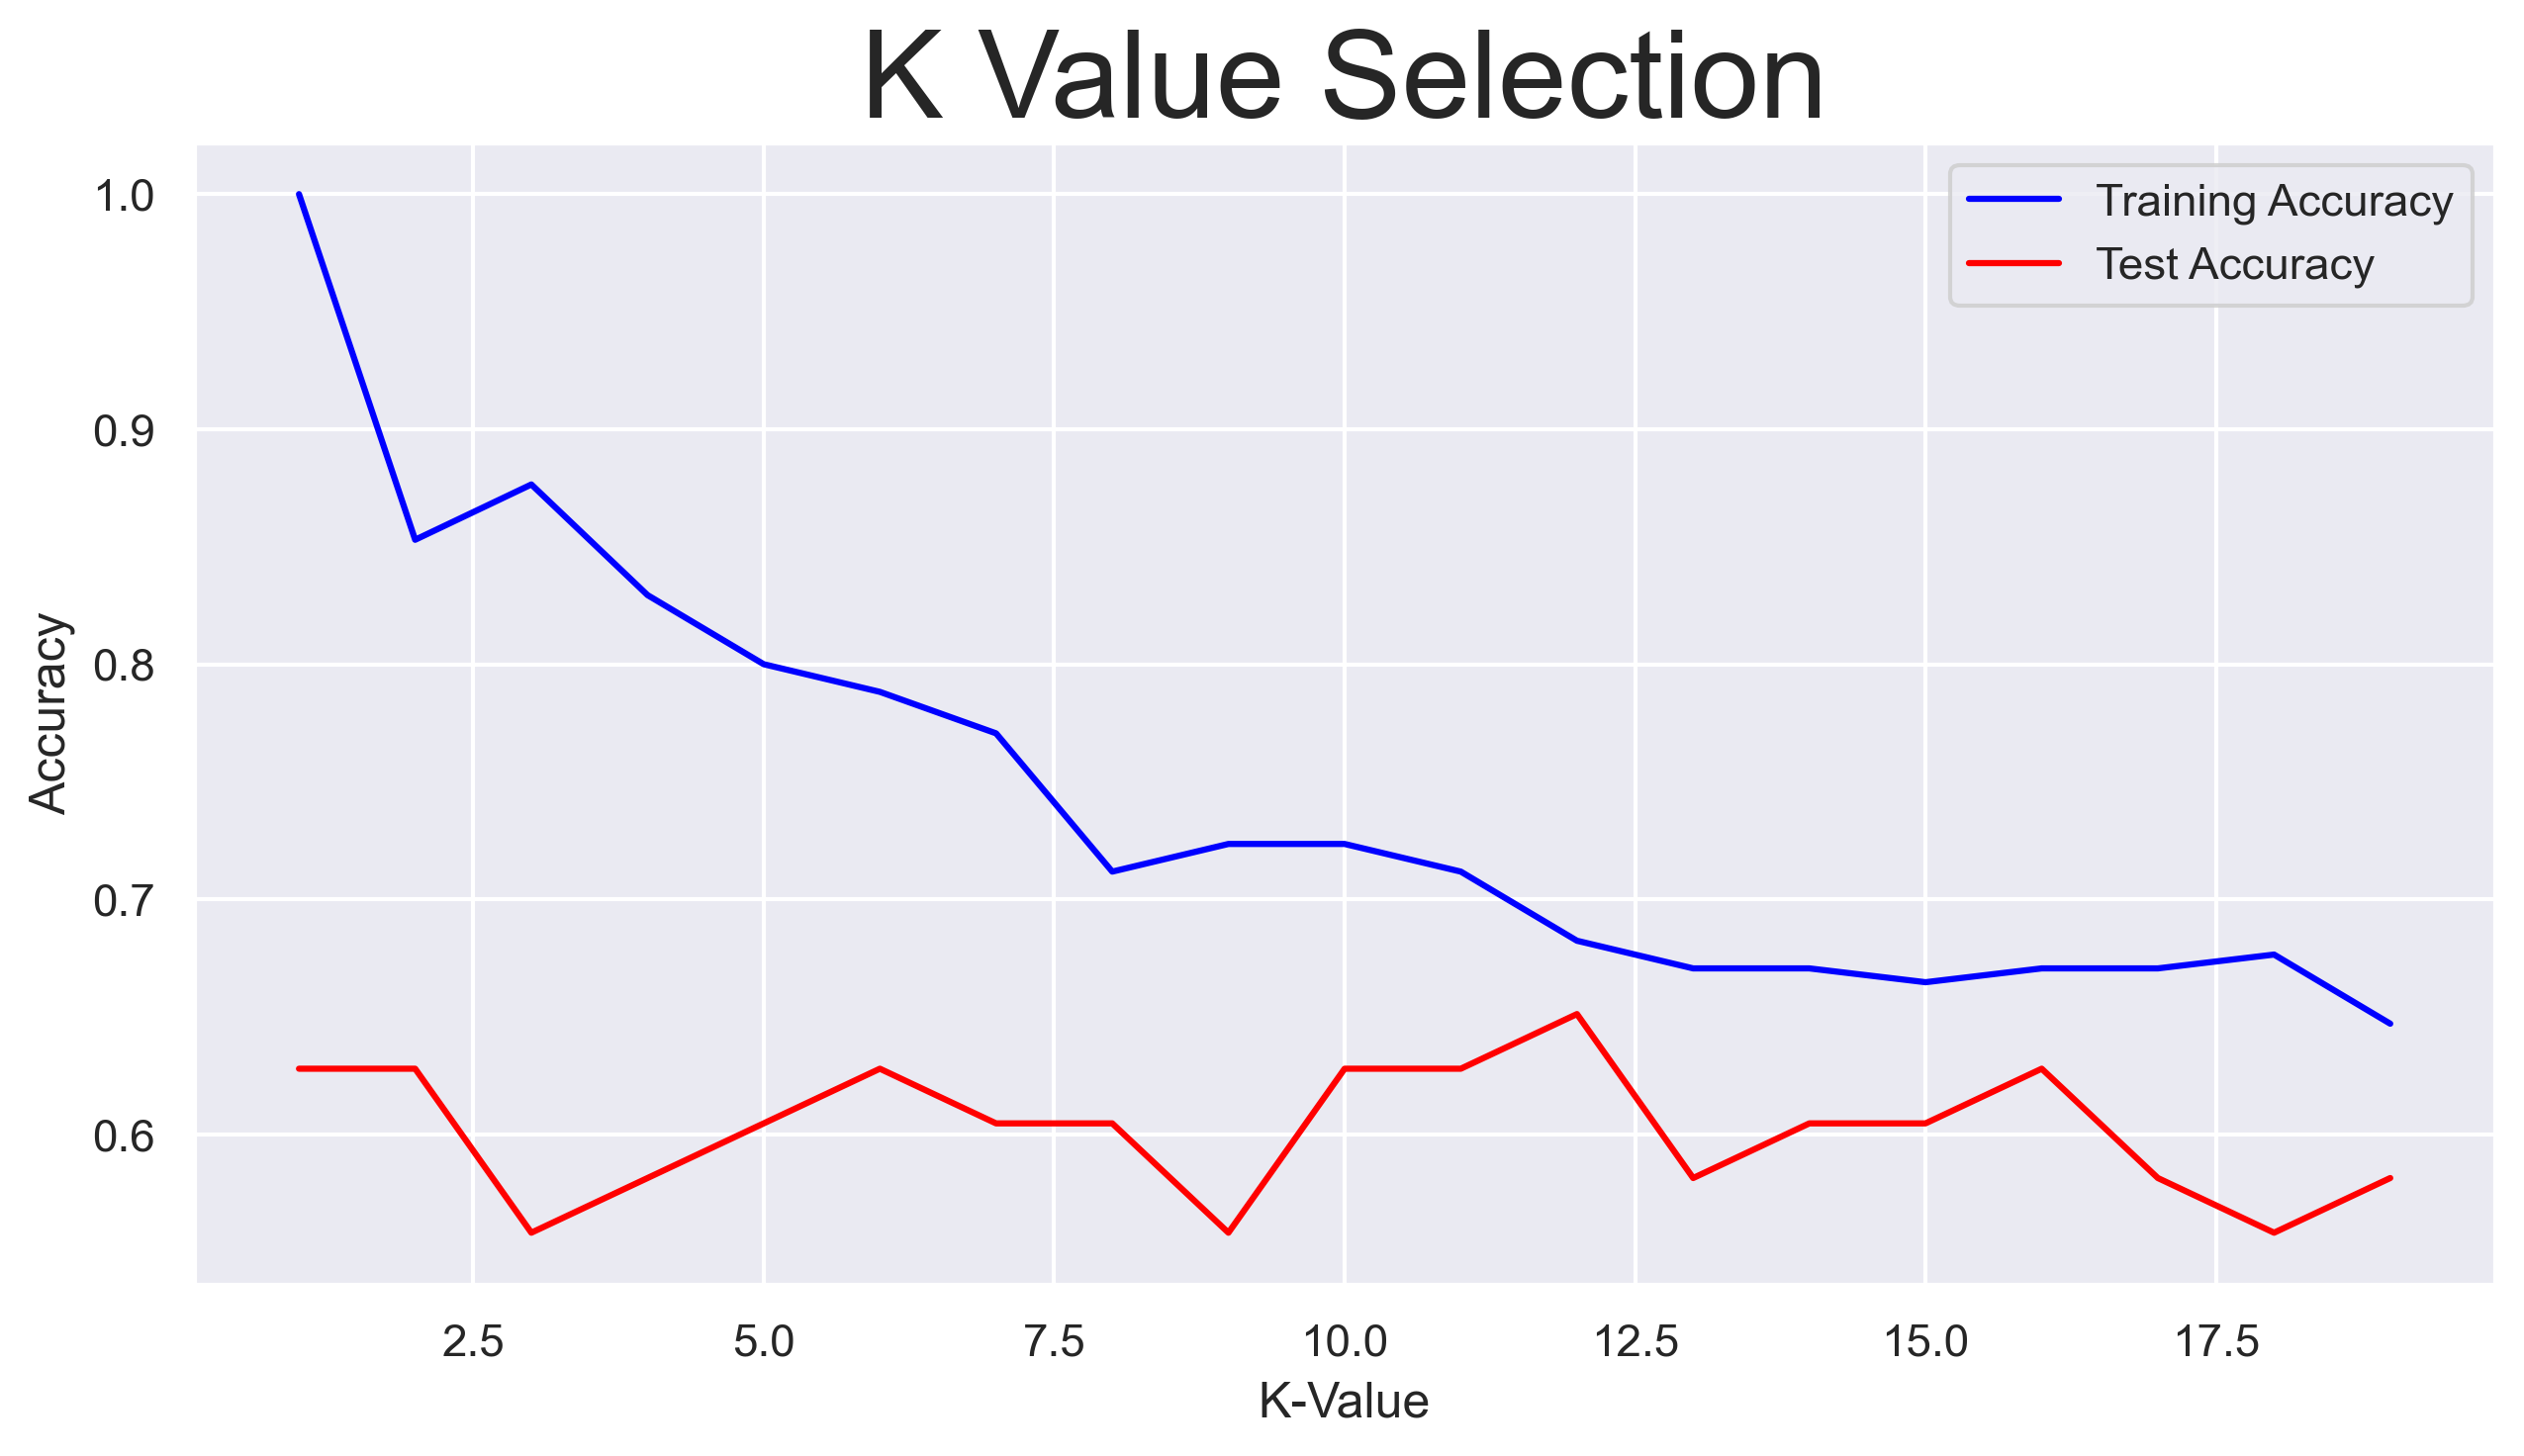

In [26]:
plt.plot(range(1,20), train_acc, color='blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Test Accuracy')
plt.title('K Value Selection', size = 30)
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()

In [27]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(x_train, y_train)

ypred = knn.predict(x_test)

In [28]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           1       0.64      0.94      0.76        17
           2       0.54      0.64      0.58        11
           3       0.00      0.00      0.00         6
           5       1.00      0.25      0.40         4
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.65        43
   macro avg       0.70      0.60      0.60        43
weighted avg       0.60      0.65      0.59        43



In [29]:
print(f' Training accuracy : {knn.score(x_train,y_train)}')
print(f' Testing accuracy : {knn.score(x_test,y_test)}')

 Training accuracy : 0.6823529411764706
 Testing accuracy : 0.6511627906976745


------------------
* Finding best parameters using GriDsearchCV

In [30]:
param = {'n_neighbors': range(1,20), 
         'metric': ['minkowski','euclidean']}

In [31]:
grid_model = GridSearchCV(estimator=knn, param_grid = param, cv = 10)

# Training the gridsearch model on train data 
grid_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=12),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': range(1, 20)})

In [32]:
print(grid_model.best_estimator_)
print(grid_model.best_params_)

KNeighborsClassifier(n_neighbors=2)
{'metric': 'minkowski', 'n_neighbors': 2}


In [33]:
grid_model.best_score_

0.7470588235294117

In [34]:
# predicting using best performing patameters

pred = grid_model.predict(x_test)

In [35]:
pred

array([2, 5, 1, 2, 1, 1, 7, 7, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 7, 2, 1, 1, 5, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1],
      dtype=int64)

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.62      0.94      0.74        17
           2       0.50      0.55      0.52        11
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.63        43
   macro avg       0.52      0.46      0.46        43
weighted avg       0.56      0.63      0.57        43



In [37]:
print(f' Training accuracy : {grid_model.score(x_train,y_train)}')
print(f' Testing accuracy : {grid_model.score(x_test,y_test)}')

 Training accuracy : 0.8529411764705882
 Testing accuracy : 0.627906976744186
